# Preprocesamiento de datos

Es el conjunto de técnicas y operaciones aplicadas a los datos antes de ser utilizados en un análisis o modelo de machine learning.

El objetivo principal del preprocesamiento es limpiar, transformar y estructurar los datos para que sean adecuados y puedan ser interpretados de manera efectiva por los algoritmos de aprendizaje automático.

A continuación, se presenta un orden comúnmente seguido en el preprocesamiento de datos:

- **Limpieza de datos:** Eliminar o manejar los datos faltantes, eliminar duplicados y corregir posibles errores en los datos.

- **Normalización de variables:** Ajustar las escalas de las variables para que tengan un rango similar, como la estandarización (mean=0, std=1).

- **Codificación de variables categóricas:** Convertir variables categóricas en representaciones numéricas adecuadas para su procesamiento, como la codificación one-hot o la codificación ordinal.

- **Manejo de valores atípicos:** Identificar y tratar los valores atípicos que pueden afectar negativamente el análisis o el modelo.

- **Selección de características:** Seleccionar las características más relevantes para el análisis o el modelo de machine learning, descartando las que aportan poca información.

- **Reducción de dimensionalidad:** Si el conjunto de datos es de alta dimensionalidad, aplicar técnicas de reducción de dimensionalidad, como PCA (Análisis de Componentes Principales) o LDA (Análisis Discriminante Lineal).

- **División de datos:** Separar los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

## Sustituir valores faltantes

La forma mas sencilla de sustitución es reemplazar los valores faltantes por una constante (0), la media, la mediana o la moda.

- **Media:** La media es una medida adecuada para variables numéricas que siguen una distribución normal o aproximadamente simétrica. Si la variable no presenta valores atípicos o la distribución no está sesgada, la imputación por media puede ser una opción razonable.

- **Mediana:** La mediana es una medida robusta que no se ve afectada por valores atípicos o distribuciones sesgadas. Es una opción más adecuada para variables numéricas con valores extremos o sesgos.

- **Moda:** La moda se utiliza para variables categóricas o variables con datos categóricos, como variables categóricas nominales o variables con valores discretos.

In [2]:
import pandas as pd

air_quality = pd.read_csv('datasets/air-quality.csv')
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    153 non-null    object 
 1   Ozone   116 non-null    float64
 2   Solar   146 non-null    float64
 3   Wind    153 non-null    float64
 4   Temp    153 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 6.1+ KB


Utilizando el metodo *info()* podemos observar que hay valores faltantes en la columna *Ozone* y en la columna *Solar*.

Revisaremos si existe algún *sesgo* en la columna *Ozone*

array([[<Axes: title={'center': 'Ozone'}>]], dtype=object)

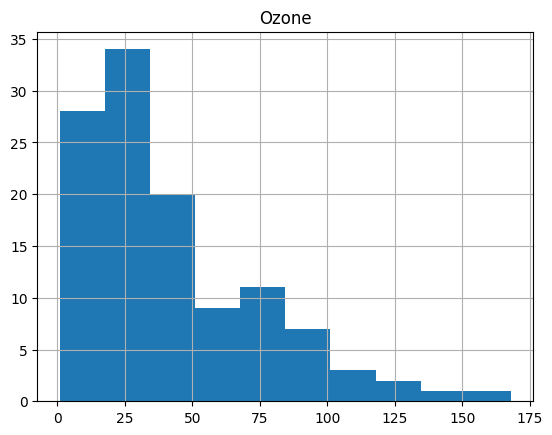

In [3]:
air_quality.hist('Ozone')

Existe un sesgo hacia la izquierda, por lo que es recomendable sustituir los valores faltantes de esta columna por la mediana

In [4]:
air_quality['Ozone'] = air_quality['Ozone'].fillna(air_quality['Ozone'].median())
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    153 non-null    object 
 1   Ozone   153 non-null    float64
 2   Solar   146 non-null    float64
 3   Wind    153 non-null    float64
 4   Temp    153 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 6.1+ KB


## Normalización


La normalización es un proceso utilizado en el preprocesamiento de datos para ajustar los valores de una variable en un rango específico.

La normalización es útil cuando se trabaja con variables numéricas que tienen diferentes rangos y distribuciones. Al normalizar los datos, se puede garantizar que todas las variables estén en el mismo rango, evitando que una variable con valores más grandes o más pequeños domine el análisis.

In [6]:
import pandas as pd
wines = pd.read_csv('./datasets/wine_types.csv')
wines.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Normalización logaritmica

Es una técnica utilizada para transformar variables que tienen una alta varianza


In [7]:
wines.var()

,0
Type,0.600679
Alcohol,0.659062
Malic acid,1.248015
Ash,0.075265
Alcalinity of ash,11.152686
Magnesium,203.989335
Total phenols,0.391690
Flavanoids,0.997719
Nonflavanoid phenols,0.015489
Proanthocyanins,0.327595


En este caso se aplicara la normalización a la columna *Proline* y a la columna *Magnesium*

In [8]:
import numpy as np
wines[['Proline', 'Magnesium']] = wines[['Proline', 'Magnesium']].agg(np.log)

In [9]:
wines.var()

,0
Type,0.600679
Alcohol,0.659062
Malic acid,1.248015
Ash,0.075265
Alcalinity of ash,11.152686
Magnesium,0.018667
Total phenols,0.391690
Flavanoids,0.997719
Nonflavanoid phenols,0.015489
Proanthocyanins,0.327595


### Estandarización

 La estandarización ajusta los valores de una variable para que tengan una media de 0 y una desviación estándar de 1.

 Esto se logra restando la media de la variable y dividiendo por la desviación estándar.

In [10]:
wines.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,4.593042,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,6.530303
std,0.775035,0.811827,1.117146,0.274344,3.339564,0.136627,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,0.415107
min,1.000000,11.030000,0.740000,1.360000,10.600000,4.248495,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,5.627621
25%,1.000000,12.362500,1.602500,2.210000,17.200000,4.477337,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,6.215606
50%,2.000000,13.050000,1.865000,2.360000,19.500000,4.584967,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,6.512486
75%,3.000000,13.677500,3.082500,2.557500,21.500000,4.672829,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,6.892642
max,3.000000,14.830000,5.800000,3.230000,30.000000,5.087596,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,7.426549


Podemos observar que los valores minimos y maximos de cada columna estan a escalas diferentes, vamos a arreglar eso estandarizando.

In [11]:
wines = (wines -wines.mean()) / wines.std()
wines.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,0.000000,-9.181170e-16,0.000000,-8.070947e-16,-7.983626e-17,5.987720e-16,3.991813e-17,-3.592632e-16,3.592632e-16,-1.596725e-16,1.995907e-17,1.995907e-16,3.193450e-16,-4.151486e-15
std,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.210529,-2.427388e+00,-1.428952,-3.668813e+00,-2.663505e+00,-2.521797e+00,-2.101318e+00,-1.691200e+00,-1.862979e+00,-2.063214e+00,-1.629691e+00,-2.088840e+00,-1.889723e+00,-2.174577e+00
25%,-1.210529,-7.860275e-01,-0.656896,-5.705131e-01,-6.871987e-01,-8.468662e-01,-8.829774e-01,-8.252115e-01,-7.380592e-01,-5.956034e-01,-7.928659e-01,-7.654033e-01,-9.495697e-01,-7.581101e-01
50%,0.079735,6.082829e-02,-0.421922,-2.375431e-02,1.514024e-03,-5.909890e-02,9.568993e-02,1.058511e-01,-1.755994e-01,-6.272092e-02,-1.587767e-01,3.303369e-02,2.370660e-01,-4.292207e-02
75%,1.370000,8.337767e-01,0.667909,6.961448e-01,6.003946e-01,5.839735e-01,8.067217e-01,8.466967e-01,6.078267e-01,6.274055e-01,4.925666e-01,7.111583e-01,7.863692e-01,8.728811e-01
max,1.370000,2.253415e+00,3.100446,3.147447e+00,3.145637e+00,3.619728e+00,2.532372e+00,3.054216e+00,2.395645e+00,3.475269e+00,3.425768e+00,3.292407e+00,1.955399e+00,2.159074e+00


## Codifiación de variables categorícas

La codificación de variables categóricas, también conocida como "encoding" en inglés, se refiere al proceso de convertir variables categóricas (como texto o etiquetas) en una forma numérica que pueda ser utilizada por algoritmos de aprendizaje automático.

Las variables categóricas representan características o atributos que no tienen un orden inherente, como el género (masculino, femenino), el estado civil (soltero, casado, divorciado), la ciudad de residencia (Nueva York, Los Ángeles, Chicago), etc.

### One Hot Enconding

Es una técnica de codificación de variables categóricas que se utiliza para convertir variables categóricas en una representación binaria numérica.

Esta técnica crea columnas binarias separadas para cada categoría en la variable categórica.

In [12]:
import pandas as pd
import pandas as pd

data = {
    'Estudiante': ['Estudiante 1', 'Estudiante 2', 'Estudiante 3', 'Estudiante 4', 'Estudiante 5', 'Estudiante 6', 'Estudiante 7', 'Estudiante 8', 'Estudiante 9', 'Estudiante 10'],
    'Nacionalidad': ['España', 'Francia', 'Alemania', 'España', 'Italia', 'Francia', 'España', 'Italia', 'Alemania', 'Francia'],
    'Asignatura': ['Matemáticas', 'Inglés', 'Historia', 'Matemáticas', 'Matemáticas', 'Inglés', 'Historia', 'Matemáticas', 'Inglés', 'Historia'],
    'Calificación': ['A', 'B', 'C', 'B', 'A', 'C', 'B', 'A', 'C', 'B'],
    'Beca': ['No', 'No', 'Sí', 'No', 'Sí', 'Sí', 'No', 'No', 'Sí', 'Sí']
}

df = pd.DataFrame(data)
df

,Estudiante,Nacionalidad,Asignatura,Calificación,Beca
0,Estudiante 1,España,Matemáticas,A,No
1,Estudiante 2,Francia,Inglés,B,No
2,Estudiante 3,Alemania,Historia,C,Sí
3,Estudiante 4,España,Matemáticas,B,No
4,Estudiante 5,Italia,Matemáticas,A,Sí
5,Estudiante 6,Francia,Inglés,C,Sí
6,Estudiante 7,España,Historia,B,No
7,Estudiante 8,Italia,Matemáticas,A,No
8,Estudiante 9,Alemania,Inglés,C,Sí
9,Estudiante 10,Francia,Historia,B,Sí


#### Codificación de variables de entrada

Al codificar las variables de entrada se utiliza la tecnica ***drop_first***.

En esta técnica, se elimina una de las columnas binarias generadas durante el One-Hot Encoding para cada variable categórica. Al eliminar una columna, se evita la redundancia.

La columna que se descarta es generalmente la primera columna generada por el One-Hot Encoding. Al descartar esta columna, se asume implícitamente que si todas las demás columnas binarias tienen el valor 0.

In [13]:
pais = df['Nacionalidad']
pais = pd.get_dummies(pais, drop_first=True)
pais

,España,Francia,Italia
0,True,False,False
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,True
5,False,True,False
6,True,False,False
7,False,False,True
8,False,False,False
9,False,True,False


#### Codificación de variables de salida



Al codificar las variables de salida la tecnica ***drop_first*** es opcional y se puede utilizar únicamente si se tienen dos categorías de salida.

In [14]:
output = df['Beca']
output = pd.get_dummies(output, drop_first=True)
output

,Sí
0,False
1,False
2,True
3,False
4,True
5,True
6,False
7,False
8,True
9,True


In [15]:
output = df['Beca']
output = pd.get_dummies(output, drop_first=False)
output

,No,Sí
0,True,False
1,True,False
2,False,True
3,True,False
4,False,True
5,False,True
6,True,False
7,True,False
8,False,True
9,False,True


# Aplicar las técnicas al dataset “Social_Network_Ads"

In [49]:
import pandas as pd
social = pd.read_csv('/content/datasets/Social_Network_Ads.csv')
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,False
1,Male,35,20000,False
2,Female,26,43000,False
3,Female,27,57000,False
4,Male,19,76000,False


In [50]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           99 non-null     object
 1   Age              99 non-null     int64 
 2   EstimatedSalary  99 non-null     int64 
 3   Purchased        99 non-null     bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.5+ KB


In [51]:
social['Gender'] = social['Gender'].str.strip().str.capitalize().map({'Male': 1, 'Female': 0})
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,False
1,1,35,20000,False
2,0,26,43000,False
3,0,27,57000,False
4,1,19,76000,False


In [52]:
social['Purchased'] = social['Purchased'].replace({False: 0, True: 1})
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [53]:
social.describe()

,Gender,Age,EstimatedSalary,Purchased
count,99.000000,99.000000,99.000000,99.000000
mean,0.505051,30.282828,57616.161616,0.191919
std,0.502519,8.230159,33344.126268,0.395814
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,25.000000,27000.000000,0.000000
50%,1.000000,28.000000,52000.000000,0.000000
75%,1.000000,33.500000,81500.000000,0.000000
max,1.000000,59.000000,150000.000000,1.000000


In [54]:
social.var()


,0
Gender,2.525253e-01
Age,6.773552e+01
EstimatedSalary,1.111831e+09
Purchased,1.566687e-01


array([[<Axes: title={'center': 'Gender'}>]], dtype=object)

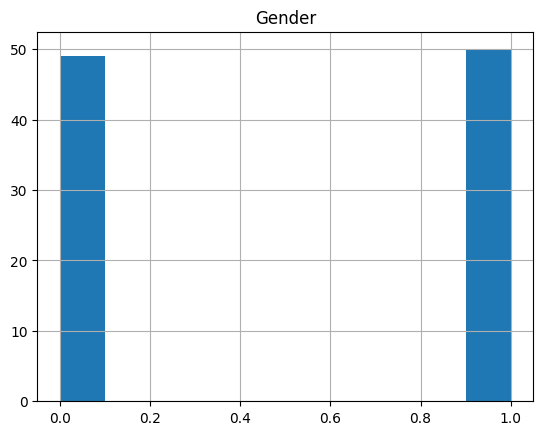

In [55]:
social.hist('Gender')

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

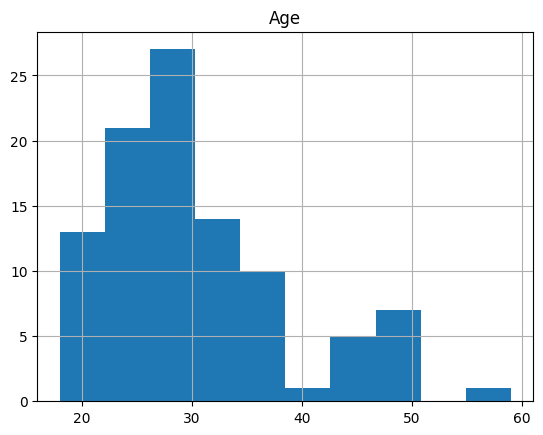

In [56]:
social.hist('Age')

array([[<Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

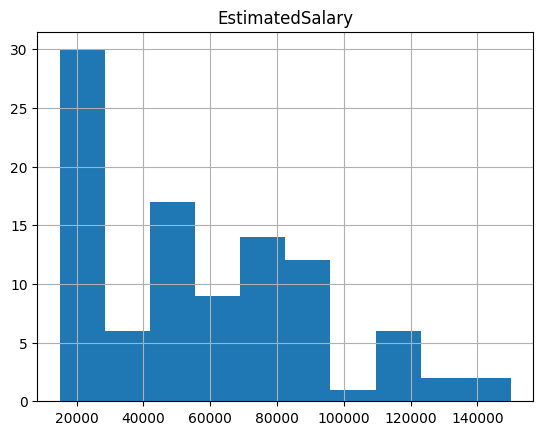

In [57]:
social.hist('EstimatedSalary')

array([[<Axes: title={'center': 'Purchased'}>]], dtype=object)

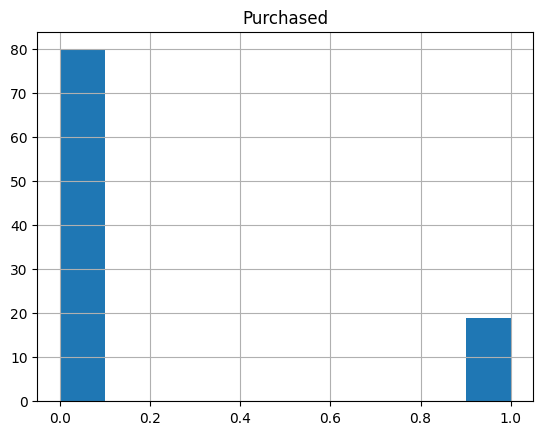

In [58]:
social.hist('Purchased')